## 1: Import packages

In [8]:
import pandas as pd
import os
import matplotlib.pyplot as plt

## 2: Load, cLean and process data

In [14]:
path = 'C:/Users/123/Downloads/sale/'
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('.csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        df = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


####  2.2: Add month column


In [10]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


#### 2.3: Get rid of 'NaN' and 'Or' value



In [11]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## 3: Reporting

#### 3.1: Best month for sales? Earned that month?

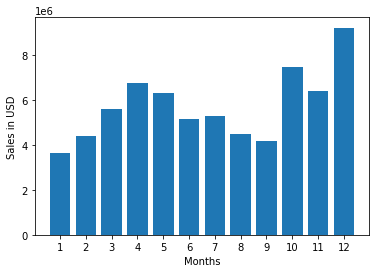

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
df.groupby('Month').sum()['Sales']
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)
plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in USD')
plt.show()

#### 3.2: Product sold the most

C:\Users\123\AppData\Local\Temp\ipykernel_1036\2603001047.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


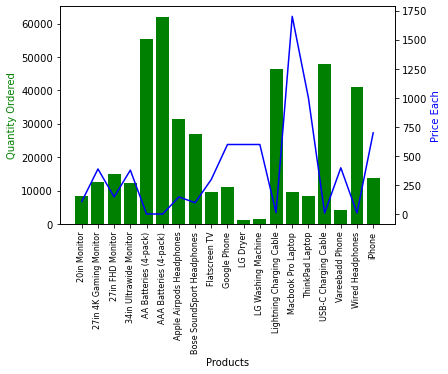

In [13]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')

plt.show()